In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('/content/social_network_ads.csv')

In [19]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


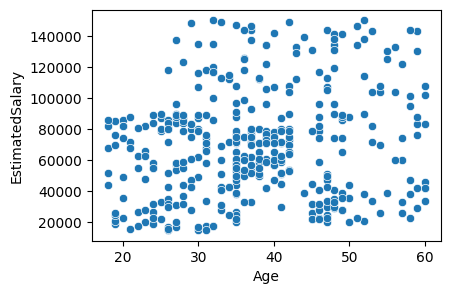

In [20]:
plt.figure(figsize=(4.5,3))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])
plt.show()

In [21]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 31ms/step - loss: 2920.4631 - accuracy: 0.6531 - val_loss: 690.7045 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 777.9360 - accuracy: 0.4156 - val_loss: 431.7389 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 451.3852 - accuracy: 0.5719 - val_loss: 403.0119 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 304.1658 - accuracy: 0.4531 - val_loss: 24.3453 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 109.6932 - accuracy: 0.5344 - val_loss: 39.2874 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 29.6793 - accuracy: 0.4906 - val_loss: 74.8564 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 59.2947 - accuracy: 0.5781 - val_loss: 59.3831 - val_accura

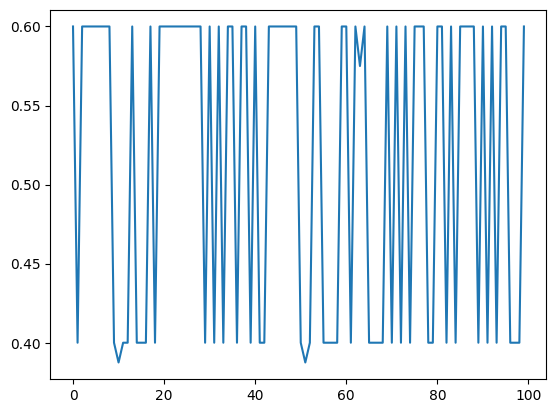

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

##As we can see without data normalization, the validation accuracy doesn't converge and oscillates between 0.4 and 0.6

In [28]:
# Applying scaling

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

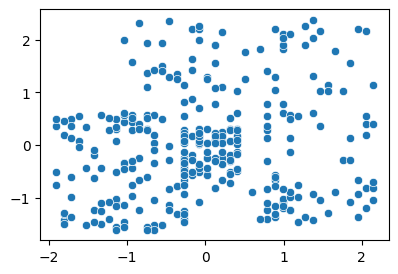

In [31]:
plt.figure(figsize=(4.5,3))
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])
plt.show()

you will notice that graph is exactly same after scaling
so scaling doesn't affect nothing

In [32]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 34ms/step - loss: 0.6894 - accuracy: 0.4000 - val_loss: 0.6497 - val_accuracy: 0.6875
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6352 - accuracy: 0.7531 - val_loss: 0.5955 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5887 - accuracy: 0.7937 - val_loss: 0.5497 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5474 - accuracy: 0.8094 - val_loss: 0.5130 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5137 - accuracy: 0.8188 - val_loss: 0.4808 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4835 - accuracy: 0.8281 - val_loss: 0.4520 - val_accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4565 - accuracy: 0.8406 - val_loss: 0.4271 - val_accuracy: 0.8250
Epoch 8/1

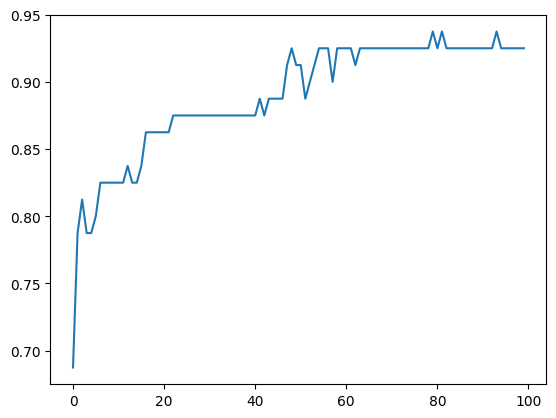

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## Now the accuracy score has converged after using scaling / normalization

### Therefore, always scale the data (-1 to 1 generally ) before training